<a href="https://colab.research.google.com/github/mwiewiorko/quantFinance/blob/master/Copy_of_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sampling and plotting


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

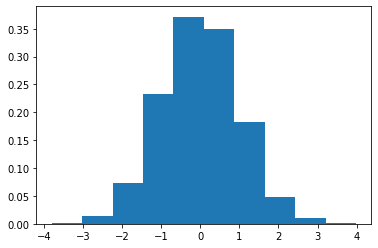

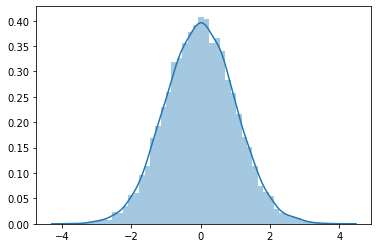

In [ ]:
a = np.random.normal(0,1,size=10000)
#bins, counts = plt.hist(a)
# plt.hist(a)
# plt.hist(a + 10)
# plt.show()

# for i in range(3):
#   plt.hist(a + i)
#   plt.show()


plt.hist(a,density=True)
plt.show()
sns.distplot(a);

## **Task**

Sample 1000 random variables from Beta($\alpha=5$, $\beta = 1$). Using *plt.hist* plot a cumulative distribution function.

* use 100 bins,
* on y axis show density, instead of count,
* change color to red
* show title as below (**Hint:** use $\LaTeX$ and *plt.hist(r 'title')* )


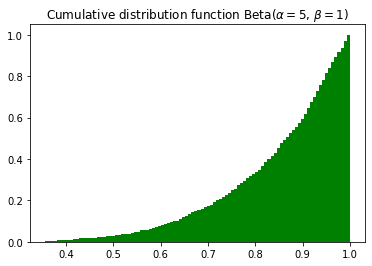

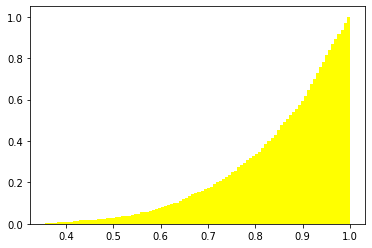

In [ ]:
# Insert your code here
b=np.random.beta(5,1,1000)
plt.hist(b,bins=100,density=True,cumulative=True,color='green') 
plt.title(r'Cumulative distribution function Beta($\alpha=5$, $\beta=1$)')
plt.show()
# nie rozumiem czemu czegoś takiego nie można zrobić (albo inaczej jak zrobić zeby cos takiego działało, czyli czy można mieć wykres w zmiennej i jak nią manipulować):
p=plt.hist(b,bins=100,density=True,cumulative=True,color='yellow')
# p.title(r'Cumulative distribution function Beta($\alpha=5$, $\beta=1$)')


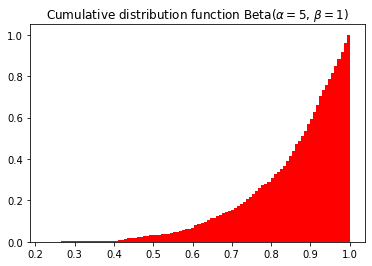

In [ ]:
#@title Answer - double click to see the code

plt.hist(np.random.beta(5,1,1000), 
         bins=100, 
         density=True, 
         cumulative=True, 
         color='r')
plt.title(r'Cumulative distribution function Beta($\alpha=5$, $\beta=1$)')
plt.show()


## **Task**

Sample $n=10000$ random vectors from multivariate normal distribution with mean 
\begin{bmatrix}
1\\
5
\end{bmatrix}

and covariance matrix
\begin{bmatrix}
1 & 0.7\\
0.7 & 1
\end{bmatrix}


* for sampling use **np.random.multivariate_normal()**,
* for plotting use **plt.scatter()** with *alpha* parameter,  

<function matplotlib.pyplot.show>

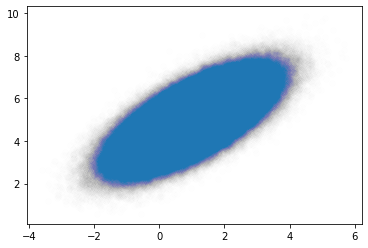

In [ ]:
# Insert your code here
mean=np.array([1,5])
cov_m=np.array([[1,0.7],
               [0.7,1]])
x=np.random.multivariate_normal(mean,cov_m,1000000)
x[:,1]
plt.scatter(x[:,0],x[:,1],alpha=0.002) # czy jest jakiś minimal alphy? wydaje sie ze 0.001 już nic nie rysuje(w R chyba też tak jest)
plt.show

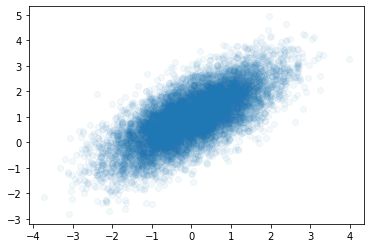

In [ ]:
#@title Answer - double click to see the code
mean = [1,5]
cov = [[1,.7],[.7,1]]

a = np.random.multivariate_normal(mean = [0,1],cov=cov,size=10000)

plt.scatter(a[:,0], a[:,1], alpha=0.05)
plt.show()

## **Task**

Using data from previous task plot the Milky Way.

* for plotting use **plt.hist2d()** with *bins* and *cmap* parameter,  

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.59305707, -3.49969761, -3.40633815, -3.31297869, -3.21961923,
        -3.12625976, -3.0329003 , -2.93954084, -2.84618138, -2.75282192,
        -2.65946245, -2.56610299, -2.47274353, -2.37938407, -2.28602461,
        -2.19266514, -2.09930568, -2.00594622, -1.91258676, -1.8192273 ,
        -1.72586783, -1.63250837, -1.53914891, -1.44578945, -1.35242999,
        -1.25907052, -1.16571106, -1.0723516 , -0.97899214, -0.88563268,
        -0.79227321, -0.69891375, -0.60555429, -0.51219483, -0.41883537,
        -0.3254759 , -0.23211644, -0.13875698, -0.04539752,  0.04796194,
         0.14132141,  0.23468087,  0.32804033,  0.42139979,  0.51475925,
         0.60811872,  0.70147818,  0.79483764,  0.8881971 ,  0.98155656,
         1.07491602, 

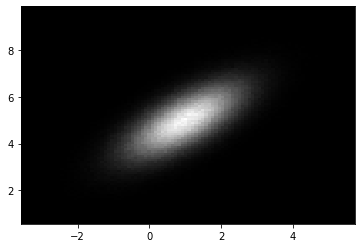

In [ ]:
# Insert your code here
plt.hist2d(x[:,0],x[:,1],bins=100,cmap="gray") # czy jest jakiś skrót aktywuje wskazówki (jak się je nieopatrznie zamknie?)


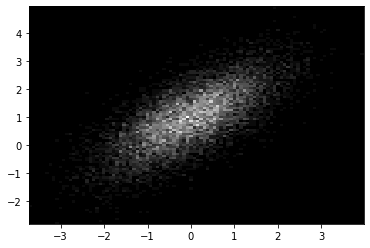

In [ ]:
#@title Answer - double click to see the code
plt.hist2d(a[:,0], a[:,1], bins=100, cmap='gray')
plt.show()

## **Task**

Use data from previous tasks.
For each vector compute its deciles $[0,1\dots,9]$ and plot the heatmap of quantity in each decile pair group: $[0,0], [0,1], \dots, [9,9]$.

* use **pandas** library and **pd.qcut()** to obtain deciles,
* for aggreagating data you can use **pd.pivot_table()** with properiate aggregation function - use **lambda** function,
* for plotting use **sns.heatmap()** from **seaborn** library.

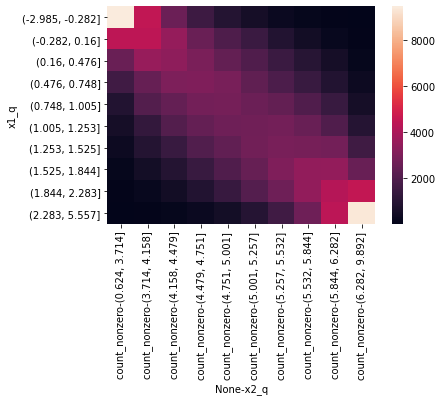

In [28]:
# Wersja orginalna
import seaborn as sns
import pandas as pd

mean=np.array([1,5])
cov_m=np.array([[1,0.7],
               [0.7,1]])
x=np.random.multivariate_normal(mean,cov_m,100000)

# Insert your code here
x1_q=pd.qcut(x[:,0],10)
x2_q=pd.qcut(x[:,1],10)

df = pd.DataFrame(list(zip(x1_q, x2_q)), 
               columns =['x1_q', 'x2_q']) 
# nie wiem czemu wydaje sie że używając count_nonzero dubluje się wynik ().
df_piv1a=df.pivot_table(index='x1_q',columns='x2_q',aggfunc=[np.count_nonzero])
df_piv1b=df.pivot_table(values='x1_q',index='x1_q',columns='x2_q',aggfunc=[np.count_nonzero])


f_l=lambda x: len(x)
df_piv2=df.pivot_table(index=['x1_q','x2_q'],aggfunc=[f_l])

sns.heatmap(df_piv1)




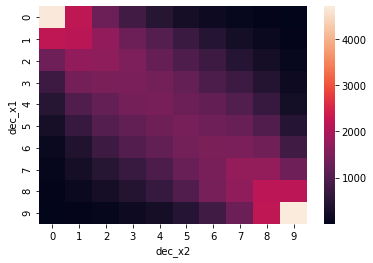

In [33]:
# Wersja po zobaczenu rozwiązania
df = pd.DataFrame(list(zip(x[:,0], x[:,1])), 
               columns =['x1', 'x2']) # pytanie czym się różni twoja definicja


df['dec_x1'] = pd.qcut(x[:,0], 10, labels=False)
df['dec_x2'] = pd.qcut(x[:,1], 10, labels=False)

df_piv3=df.pivot_table(
    values='x1',
    index='dec_x1',
    columns='dec_x2',
    aggfunc= lambda x: len(x)
    )
sns.heatmap(df_piv3)

#coś warto wedzieć na temat cmap? Rozumiem że chodzi o mapowanie kolorów

In [ ]:
df_piv1a

In [ ]:
df_piv2


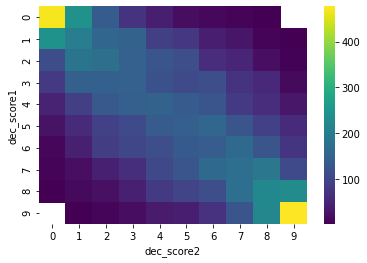

In [ ]:
#@title Answer - double click to see the code

import seaborn as sns
import pandas as pd


score1 = a[:,0]
score2 = a[:,1]

df = pd.DataFrame({'score1': score1,
                   'score2': score2
                  })

df['dec_score1'] = pd.qcut(score1, 10, labels=False)
df['dec_score2'] = pd.qcut(score2, 10, labels=False)


pivot = pd.pivot_table(df, 
               values='score1',
               index=['dec_score1'],
               columns=['dec_score2'],
               aggfunc=lambda x: len(x))

sns.heatmap(pivot, cmap='viridis')